<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
## Write your code here

# Column names
print("Column names in the dataset are :")
print(df.columns.to_list())

# Data types
#pd.set_option("display.max_rows", None)
print("Data types of the column names are :")
print(df.dtypes)

# Summary information
print("Summary information " )
print(df.info())


Column names in the dataset are :
['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [4]:
## Write your code here
print("\nMissing values count in YearsCode and YearsCodePro column are : ")
print(df[['YearsCode', 'YearsCodePro']].isnull().sum())

# COnvert  'YearsCode' and 'YearsCodePro' column type to numeric 
df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Filling missing values in YearsCode with median
df['YearsCode'] = df['YearsCode'].fillna(df['YearsCode'].median())

# Fillinf missing values in YearsCodePro with median
df['YearsCodePro'] = df['YearsCodePro'].fillna(df['YearsCodePro'].median())

# Verify that missing values in YearsCode and YearsCodePro after imputation
print("\nMissing values after handling YearsCode and YearsCodePro:")
print(df[['YearsCode', 'YearsCodePro']].isnull().sum())



Missing values count in YearsCode and YearsCodePro column are : 
YearsCode        5568
YearsCodePro    13827
dtype: int64

Missing values after handling YearsCode and YearsCodePro:
YearsCode       0
YearsCodePro    0
dtype: int64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [5]:
## Write your code here

print("Value counts for Employment column : ")
print(df['Employment'].value_counts())

print("Value counts for JobSat column : ")
print(df['JobSat'].value_counts())

print("Value counts for YearsCodePro column : ")
print(df['YearsCodePro'].value_counts())

Value counts for Employment column : 
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, b

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


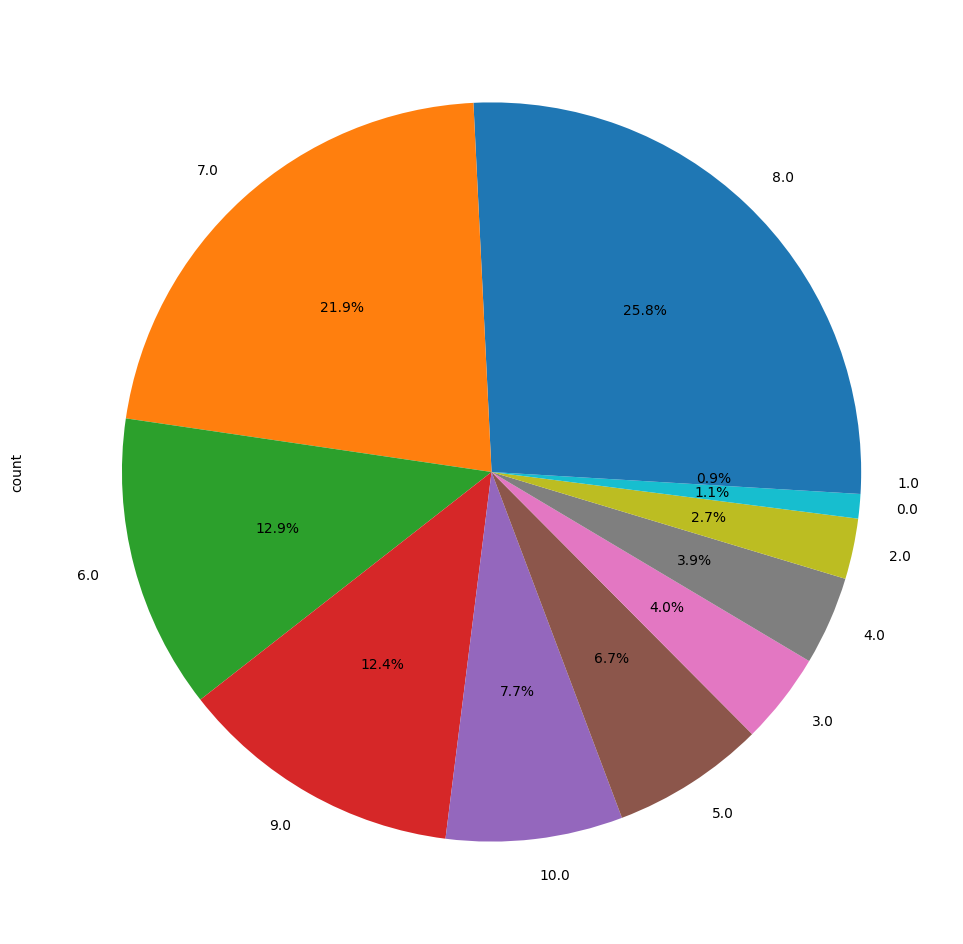

In [6]:
## Write your code here

plt.figure(figsize=(15, 12))
JobSat = df['JobSat'].value_counts()
JobSat.plot.pie(autopct="%.1f%%");
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [14]:
from collections import Counter
## Write your code here
df[['LanguageHaveWorkedWith','LanguageWantToWorkWith']].isnull().sum()

# Handle missing values
#df['LanguageHaveWorkedWith'].fillna('', inplace=True)
#df['LanguageWantToWorkWith'].fillna('', inplace=True)

LanguageHaveWorkedWith_List = df.assign(LanguageHaveWorkedWith=df['LanguageHaveWorkedWith'].str.split(';')).explode('LanguageHaveWorkedWith')
LanguageHaveWorkedWith_List = df.assign(LanguageHaveWorkedWith=df['LanguageWantToWorkWith'].str.split(';')).explode('LanguageWantToWorkWith')

# Count the occurrences of each programming language across all countries
LanguageHaveWorkedWith_Count = LanguageHaveWorkedWith_List['LanguageHaveWorkedWith'].value_counts().reset_index()
LanguageHaveWorkedWith_Count = LanguageHaveWorkedWith_List['LanguageWantToWorkWith'].value_counts().reset_index()

LanguageHaveWorkedWith_Count.columns = ['Programming Language', 'Count']
sortedHaveworked = LanguageHaveWorkedWith_Count.sort_values(by='Count', ascending=False)

LanguageHaveWorkedWith_Count.columns = ['Programming Language', 'Count']
sortedworkwith = LanguageHaveWorkedWith_Count.sort_values(by='Count', ascending=False)



print(sortedHaveworked,sortedworkwith)
df.shape

                                    Programming Language  Count
0                                                          9685
1                                                 Python    922
2                                                   Rust    737
3                         HTML/CSS;JavaScript;TypeScript    632
4                                                     C#    538
...                                                  ...    ...
10537  Elixir;Go;HTML/CSS;Java;JavaScript;PHP;Python;...      1
10536  Bash/Shell (all shells);C;C++;HTML/CSS;JavaScr...      1
10535                    C;C++;Go;MATLAB;Python;Rust;SQL      1
10534  Assembly;Bash/Shell (all shells);C#;C++;Dart;G...      1
10542                  C;Java;JavaScript;Rust;TypeScript      1

[22770 rows x 2 columns]                                     Programming Language  Count
0                                                          9685
1                                                 Python    922
2             

(65437, 114)

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


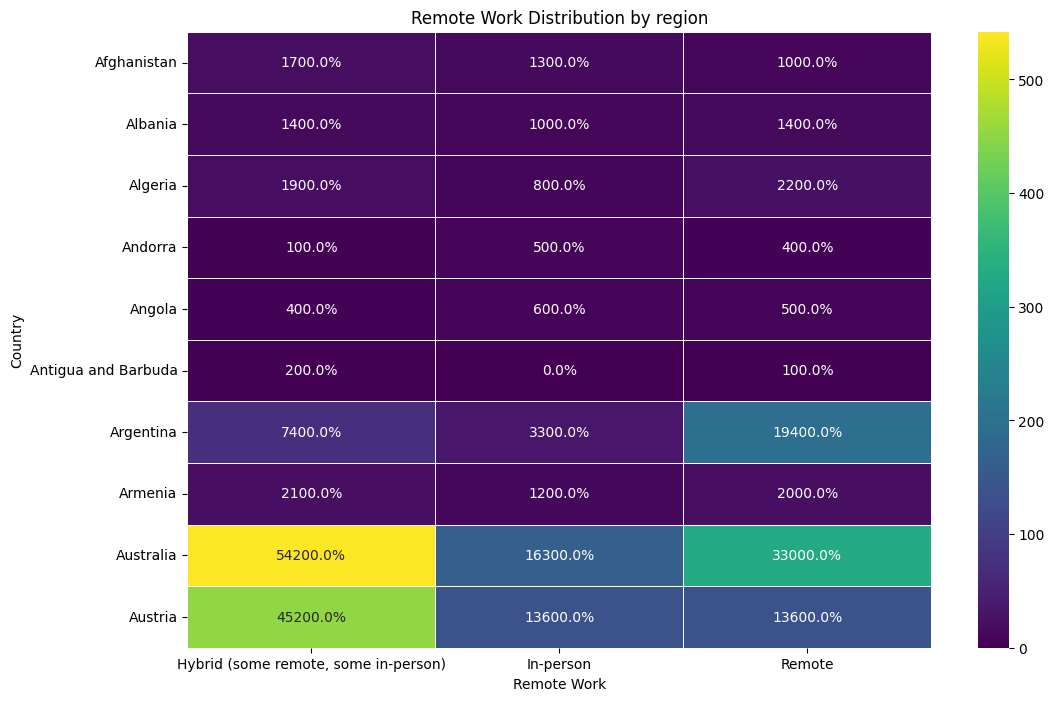

In [27]:
## Write your code here
# Heatmap Visualization
RW_Region = pd.crosstab(df['Country'], df['RemoteWork']).head(10)
plt.figure(figsize=(12,8))
sns.heatmap(RW_Region, annot=True, cmap="viridis", fmt=".1%", linewidths=0.5)
plt.title(f'Remote Work Distribution by region')
plt.xlabel('Remote Work')
plt.ylabel('Country')
plt.yticks(rotation=0)
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [31]:
## Write your code here
# Pearson correlation coefficient
Pearson_corr = df['JobSat'].corr(df['YearsCodePro'], method='pearson')
print(f"Pearson correlation coefficient is : {Pearson_corr}")



Pearson correlation coefficient is : 0.10234884441553853


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


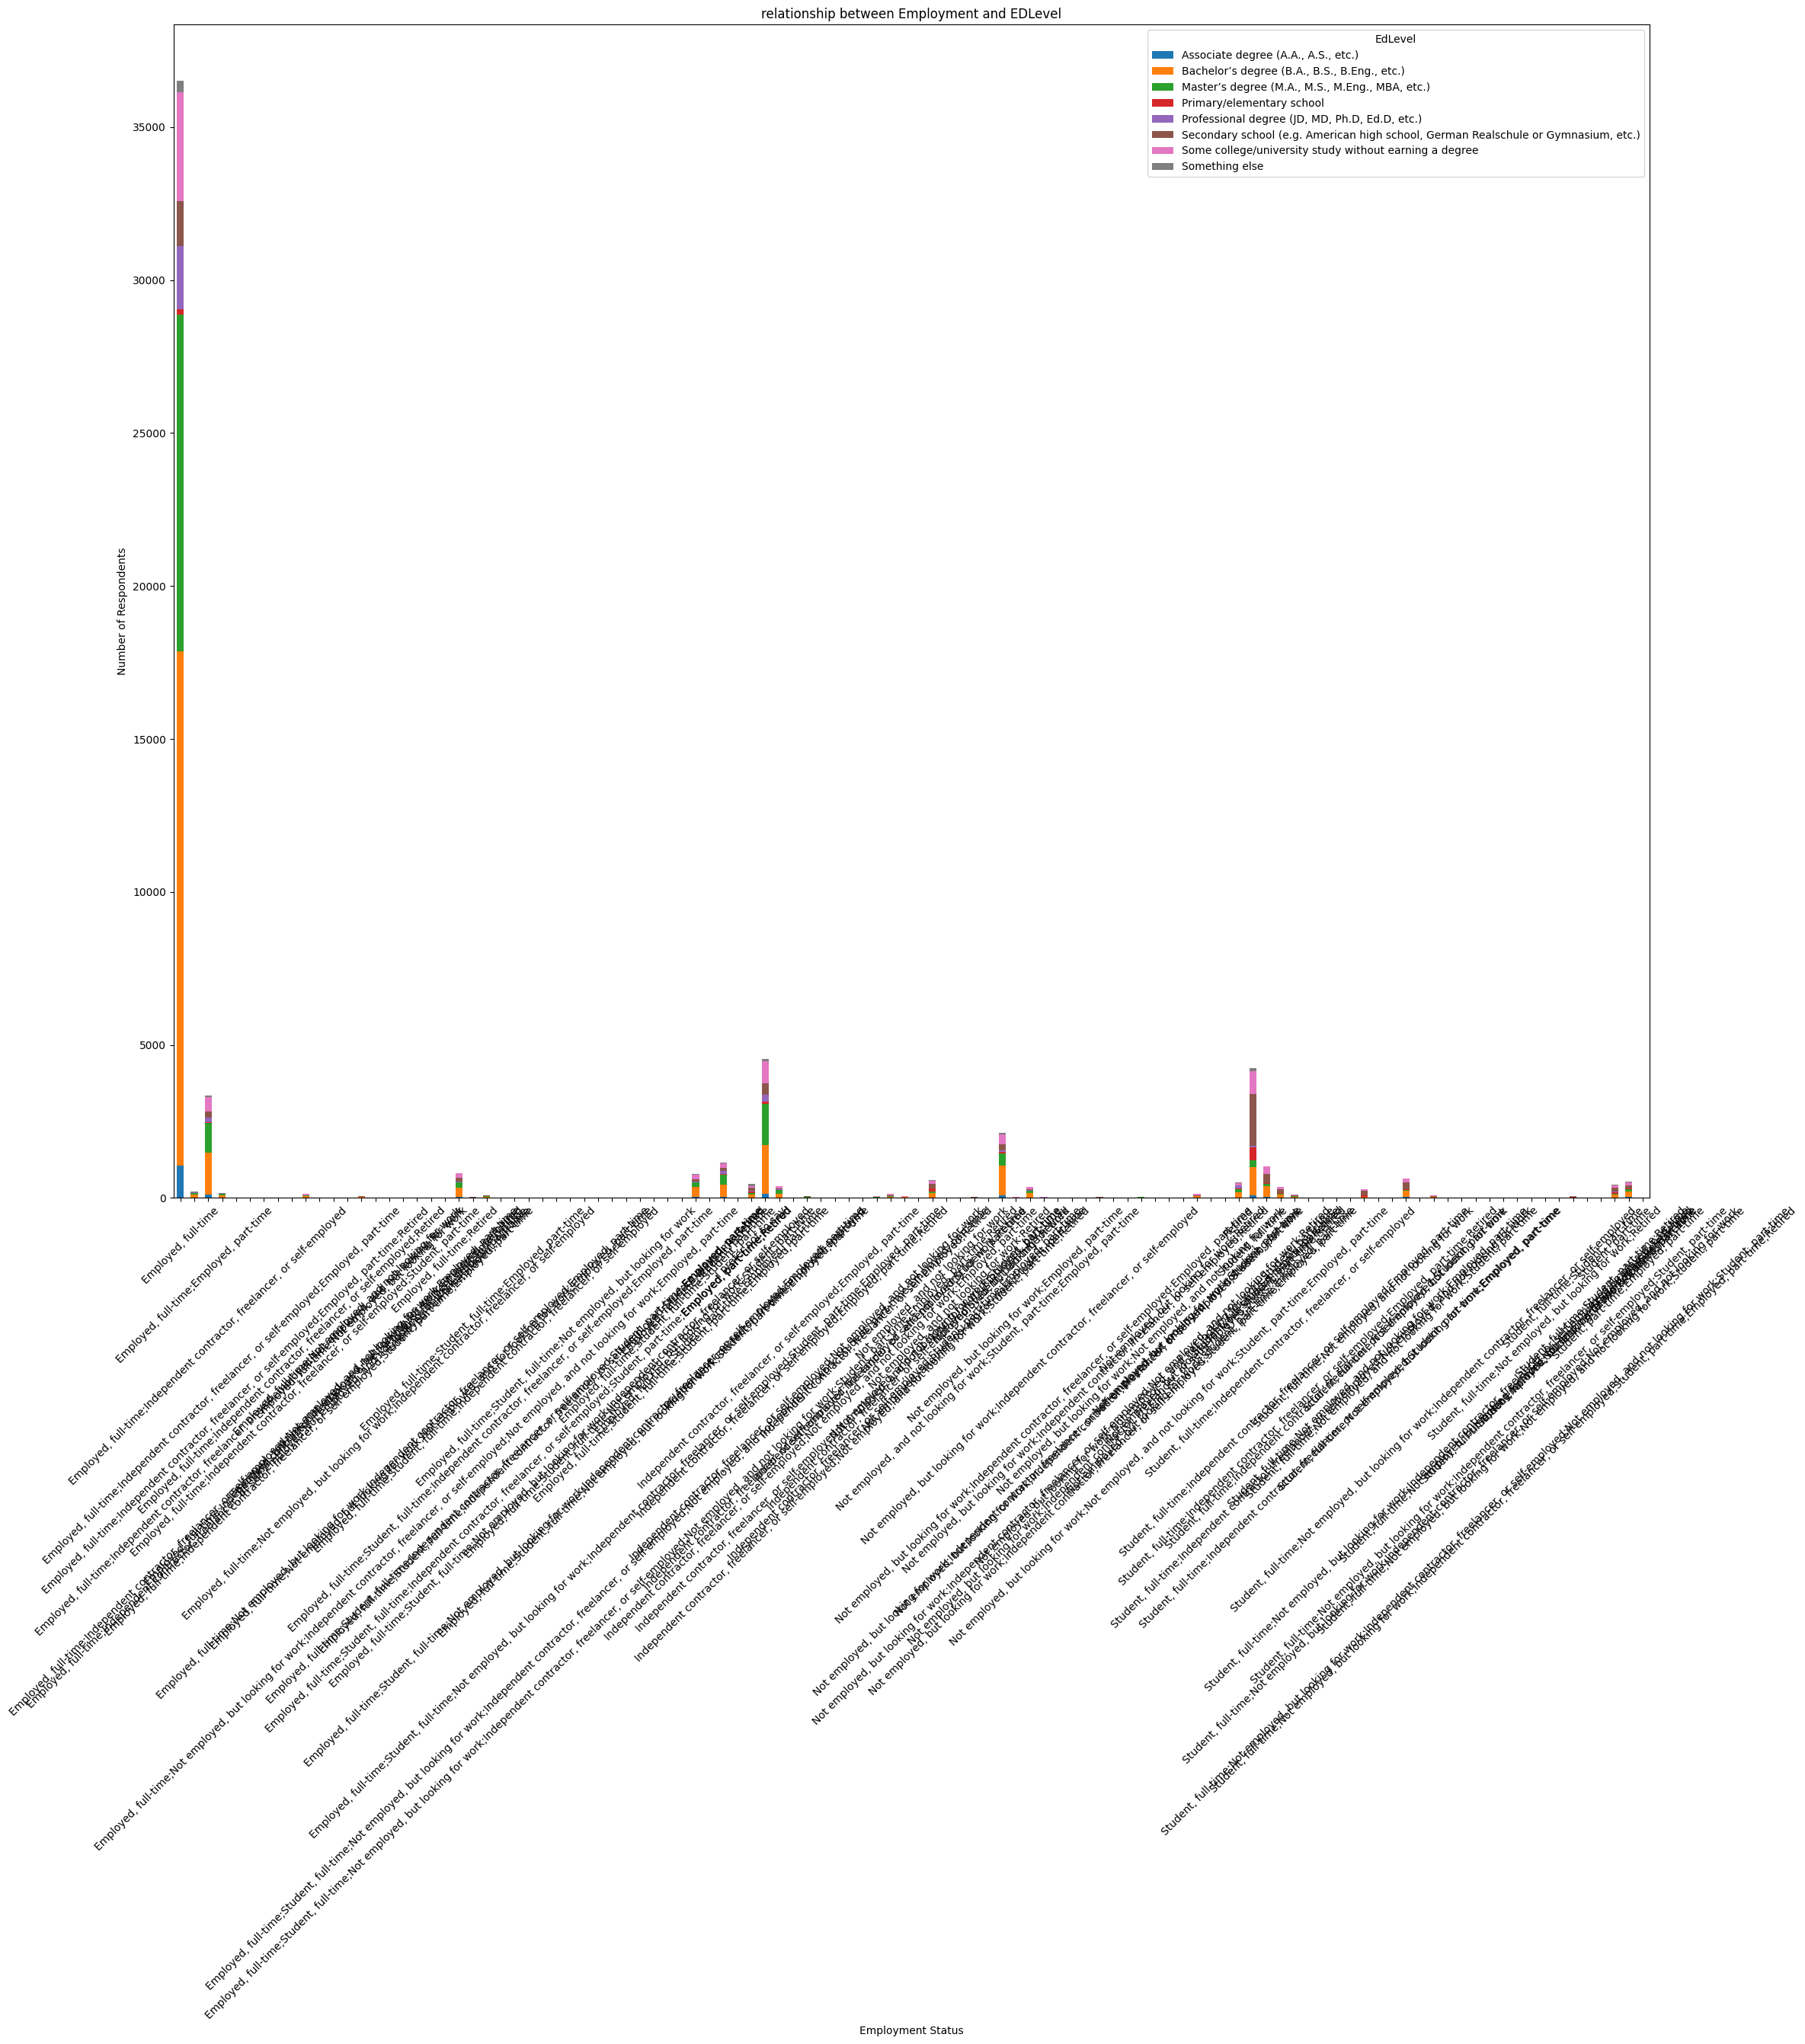

In [39]:
## Write your code here

# Cross-tabulation
Crosstab_Emp_Edlevel = pd.crosstab(df['Employment'], df['EdLevel'])
#print(df['Employment'].unique())

# Create the stacked bar plot
Crosstab_Emp_Edlevel.plot(kind='bar', stacked=True, figsize=(25, 20))
plt.title('relationship between Employment and EDLevel')
plt.xlabel('Employment Status')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [40]:
## Write your code here
# Save the cleaned DataFrame to a new CSV file
df.to_csv('survey_data_updated_2.csv', index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
